In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df_count = pd.read_csv("results/hochuli/count.csv")
df_count

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.077848,0.958623,0.625944,18.802833,271,1056384000
1,1,2,0.756041,0.705587,0.740556,18.570406,196,1056384000
2,1,3,0.627331,0.585848,0.776111,18.664468,356,1056384000
3,1,4,0.550740,0.534774,0.794444,18.537678,181,1056384000
4,1,5,0.497681,0.500840,0.811944,16.949053,255,1056384000
...,...,...,...,...,...,...,...,...
250,5,47,0.160456,0.289406,0.903667,13.924776,263,1056384000
251,5,48,0.156830,0.285533,0.905111,17.994119,289,1056384000
252,5,49,0.151785,0.290211,0.901278,17.451107,258,1056384000
253,5,50,0.153382,0.302919,0.898611,18.260764,255,1056384000


In [46]:
df_original = pd.read_csv("results/hochuli/original.csv")
df_original

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.076448,0.940860,0.637611,15.515345,0,0
1,1,2,0.767426,0.716948,0.745389,12.843624,0,0
2,1,3,0.636467,0.590405,0.777944,12.673248,0,0
3,1,4,0.553782,0.551070,0.791056,13.109071,0,0
4,1,5,0.493711,0.500651,0.818667,12.691762,0,0
...,...,...,...,...,...,...,...,...
250,5,47,0.150566,0.299713,0.903889,13.913952,0,0
251,5,48,0.147795,0.300733,0.903278,13.728238,0,0
252,5,49,0.146143,0.296230,0.904611,13.815152,0,0
253,5,50,0.143592,0.313043,0.900833,13.170426,0,0


In [47]:
df_diff = pd.read_csv("results/hochuli/diff.csv")
df_diff

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.290108,2.198079,0.224222,13.482002,0,0
1,1,2,0.946207,0.720950,0.741278,13.864604,0,0
2,1,3,0.653622,0.601815,0.776889,14.125720,0,0
3,1,4,0.567568,0.556717,0.788611,13.961862,0,0
4,1,5,0.506374,0.530619,0.802944,12.726043,0,0
...,...,...,...,...,...,...,...,...
250,5,47,0.150821,0.290354,0.904333,15.265646,0,0
251,5,48,0.148586,0.306200,0.899111,15.687904,0,0
252,5,49,0.144009,0.312686,0.900056,15.100466,0,0
253,5,50,0.143545,0.301536,0.902500,15.581184,0,0


In [48]:
# splitting training and test
df_count_train = df_count[df_count["epoch"] != -1]
df_count_test = df_count[df_count["epoch"] == -1]
df_original_train = df_original[df_original["epoch"] != -1]
df_original_test = df_original[df_original["epoch"] == -1]
df_diff_train = df_diff[df_diff["epoch"] != -1]
df_diff_test = df_diff[df_diff["epoch"] == -1]

In [49]:
# add relu proportion
df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
df_diff_train["relu_proportion"] = df_diff_train["zero_relu_call"] / df_diff_train["total_relu_call"]

/tmp/ipykernel_6762/561248041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
/tmp/ipykernel_6762/561248041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
/tmp/ipykernel_6762/561248041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

## Frequência da ReLU

Tamanho da rede: 122_570

In [50]:
df_train_avg = df_count_train.groupby("epoch").mean()
relu_proportion = df_train_avg["zero_relu_call"].sum() / df_train_avg["total_relu_call"].sum()
print(f"Proporção Média da ReLU: {relu_proportion}    1/{round(1/relu_proportion):_}")

Proporção Média da ReLU: 6.095446352841391e-06    1/164_057


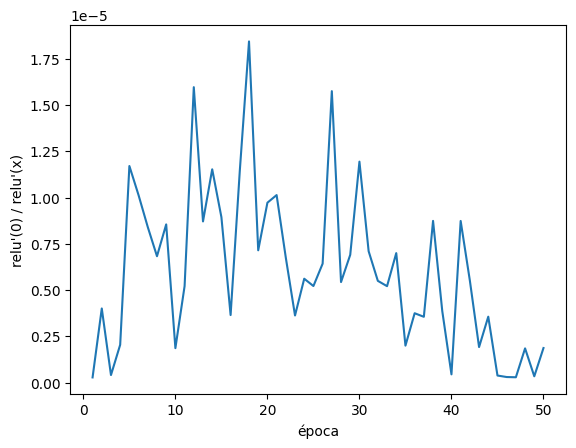

In [51]:
df_train_avg = df_count_train.groupby("epoch").mean()
ax = sns.lineplot(data=df_train_avg, x="epoch", y="relu_proportion")
ax.set(xlabel="época", ylabel="relu'(0) / relu'(x)")
plt.savefig('relu_proportion.eps', format='eps')

## Eficiência do Modelo

In [52]:
print(f"Acurácia (teste) média: {round(100*df_count_test['val_acc'].mean(), 2)}%")

Acurácia (teste) média: 89.85%


<Axes: xlabel='epoch', ylabel='train_loss'>

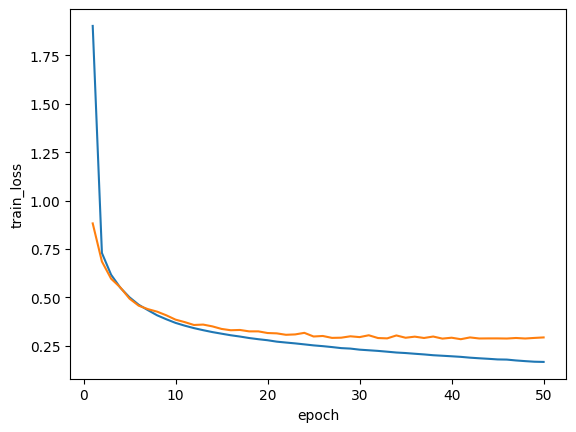

In [53]:
ax = sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss", ax=ax)

In [54]:
df_train_sum = df_count_train.groupby("execution").sum()
seconds_avg = round(df_train_sum["time"].mean())
minutes_avg = seconds_avg // 60
seconds_avg = seconds_avg % 60
print(f"Tempo médio de treino: {minutes_avg}:{seconds_avg}")

Tempo médio de treino: 13:25


## Comparando com funções diferenciáveis

In [55]:
df_train_avg_diff = df_diff_train.groupby("epoch").mean()
df_train_avg_original = df_original_train.groupby("epoch").mean()

[Text(0.5, 0, 'época'), Text(0, 0.5, 'tempo (seg)')]

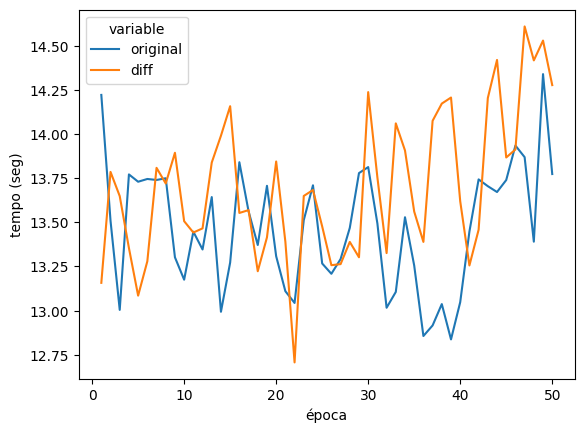

In [56]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["time"]
temp["diff"] = df_train_avg_diff["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
#ax.set_title("Tempo por Epoca")
ax.set(xlabel="época", ylabel="tempo (seg)")

In [57]:
# tempo total de treino
time_original = round(df_train_avg_original["time"].sum())
time_diff = round(df_train_avg_diff["time"].sum())

print(f"Tempo total de treino (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo total de treino (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo total de treino (não diff): 11:13
Tempo total de treino (diff): 11:25
Diferença: 1.78%


Text(0.5, 1.0, 'Loss (Treino) por Epoca')

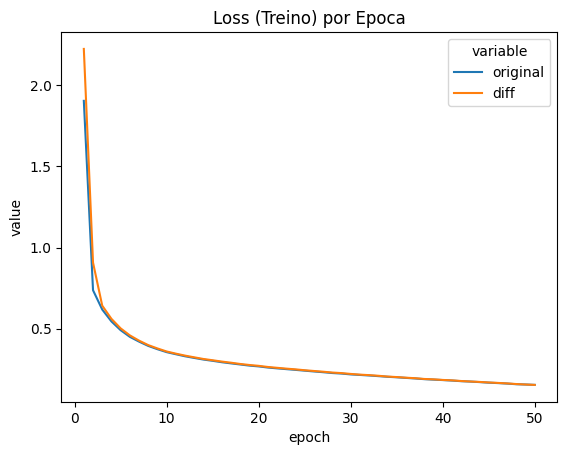

In [58]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["train_loss"]
temp["diff"] = df_train_avg_diff["train_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Treino) por Epoca")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


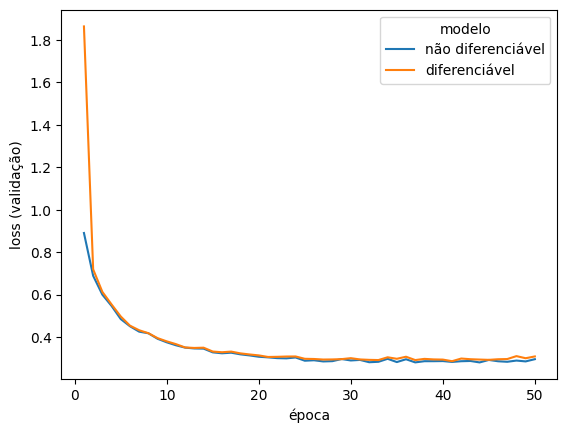

In [68]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_loss"]
temp["diff"] = df_train_avg_diff["val_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
temp = temp.rename(columns={"variable": "modelo"})
temp["modelo"] = temp["modelo"].replace("original", "não diferenciável")
temp["modelo"] = temp["modelo"].replace("diff", "diferenciável")
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="modelo")
ax.set(xlabel="época", ylabel="loss (validação)")
plt.savefig('val_loss.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


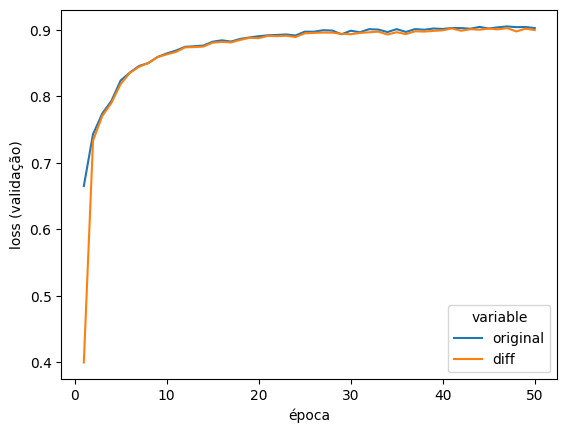

In [43]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_acc"]
temp["diff"] = df_train_avg_diff["val_acc"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")

In [32]:
# melhor época original
best_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()]
best_original

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
44,3.0,0.170692,0.280153,0.904489,13.671448,0.0,0.0,NaN


In [33]:
# melhor época diff
best_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()]
best_diff

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
41,3.0,0.181405,0.285902,0.902278,13.255686,0.0,0.0,NaN


In [34]:
column_original = np.array([best_original.index[0]] + list(best_original.values[0]))[:6]
column_diff = np.array([best_diff.index[0]] + list(best_diff.values[0]))[:6]
column_difference = 100 * (column_diff - column_original) / column_original
indexes = ["epoch"] + list(best_original)[:5]
pd.DataFrame({"Não Diferenciáveis": column_original, "Diferenciáveis": column_diff, "Diferença (%)": column_difference}, index=indexes)

,Não Diferenciáveis,Diferenciáveis,Diferença (%)
epoch,44.000000,41.000000,-6.818182
execution,3.000000,3.000000,0.000000
train_loss,0.170692,0.181405,6.276348
val_loss,0.280153,0.285902,2.052350
val_acc,0.904489,0.902278,-0.244460
time,13.671448,13.255686,-3.041102


In [35]:
list(best_original)

['execution',
 'train_loss',
 'val_loss',
 'val_acc',
 'time',
 'zero_relu_call',
 'total_relu_call',
 'relu_proportion']

In [ ]:
    # tempo para chegar na melhor época
    epoch_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()].index[0]
    epoch_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()].index[0]

    time_original = round(df_train_avg_original.head(epoch_original)["time"].sum())
    time_diff = round(df_train_avg_diff.head(epoch_diff)["time"].sum())

    #print(f"Tempo de treino até melhor época (não diff): {time_original//60:02}:{time_original%60:02}")
    #print(f"Tempo de treino até melhor época (diff): {time_diff//60:02}:{time_diff%60:02}")
    print(f"Tempo de treino até melhor época (não diff): {time_original}")
    print(f"Tempo de treino até melhor época (diff): {time_diff}")
    print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo de treino até melhor época (não diff): 590
Tempo de treino até melhor época (diff): 557
Diferença: -5.59%


## Avaliação nos dados de teste

In [37]:
df_diff_test

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
50,1,-1,NaN,0.308431,0.8963,1.670027,0,0
101,2,-1,NaN,0.328368,0.8962,1.728702,0,0
152,3,-1,NaN,0.317599,0.8979,1.687663,0,0
203,4,-1,NaN,0.325496,0.8958,1.878636,0,0
254,5,-1,NaN,0.316609,0.8993,1.927245,0,0


In [38]:
df_original_test

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
50,1,-1,NaN,0.300122,0.8989,1.674070,0,0
101,2,-1,NaN,0.304217,0.9021,1.679343,0,0
152,3,-1,NaN,0.299799,0.8984,1.913525,0,0
203,4,-1,NaN,0.302899,0.8994,1.915184,0,0
254,5,-1,NaN,0.327480,0.8975,1.685238,0,0


In [39]:
# prediction time
diff_time = df_diff_test["time"].mean()
original_time = df_original_test["time"].mean()
diff = (diff_time - original_time) / original_time
print(f"Tempo Diferenciáveis: {diff_time} seg")
print(f"Tempo Não-diferenciáveis: {original_time} seg")
print(f"Diferenciáveis são {round(100*diff, 2)}% mais lentas")

Tempo Diferenciáveis: 1.7784544467926025 seg
Tempo Não-diferenciáveis: 1.7734719276428224 seg
Diferenciáveis são 0.28% mais lentas


In [40]:
# loss
diff_loss = df_diff_test["val_loss"].mean()
original_loss = df_original_test["val_loss"].mean()
diff = (diff_loss - original_loss) / original_loss
print(f"Loss Diferenciáveis: {diff_loss}")
print(f"Loss Não-diferenciáveis: {original_loss}")
print(f"Diferenciáveis são {round(100*diff, 2)}% piores")

Loss Diferenciáveis: 0.3193008476495743
Loss Não-diferenciáveis: 0.3069032913446426
Diferenciáveis são 4.04% piores


In [41]:
# acc
diff_acc = df_diff_test["val_acc"].mean()
original_acc = df_original_test["val_acc"].mean()
diff = (diff_acc - original_acc) / original_acc
print(f"Acurácia Diferenciáveis: {diff_acc} seg")
print(f"Acurácia Não-diferenciáveis: {original_acc} seg")
if diff < 0:
    print(f"Acurácia das diferenciáveis é {-round(100*diff, 2)}% menor")
else:
    print(f"Acurácia das diferenciáveis é {round(100*diff, 2)}% maior")

Acurácia Diferenciáveis: 0.8971 seg
Acurácia Não-diferenciáveis: 0.89926 seg
Acurácia das diferenciáveis é 0.24% menor
